## Problem Statement: Implement a KNN model to classify the animals in to categorie

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import warnings
warnings.simplefilter('ignore')

In [2]:
data=pd.read_csv('Zoo.csv')
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


<AxesSubplot:>

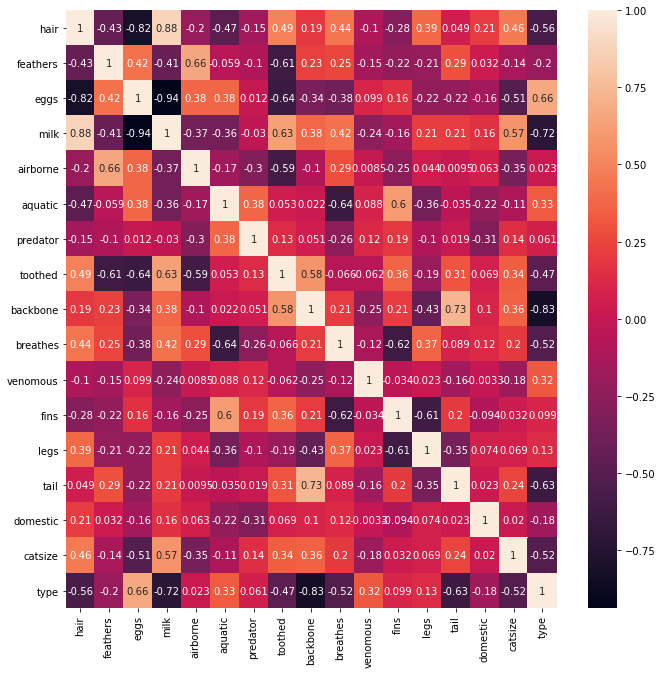

In [4]:
fig, ax = plt.subplots(figsize=(11,11))
sns.heatmap(data.corr(),annot=True)

In [5]:
data['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [6]:
data.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [7]:
#Count of animals in particular type
data.groupby(['type'],sort=False)[['animal name']].count()

,animal name
type,
1,41
4,13
2,20
7,10
6,8
5,4
3,5


In [8]:
data['animal name'].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

In [9]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
data["animal name"] = label_encoder.fit_transform(data["animal name"])

In [10]:
array = data.values
array

array([[ 0,  1,  0, ...,  0,  1,  1],
       [ 1,  1,  0, ...,  0,  1,  1],
       [ 2,  0,  0, ...,  0,  0,  4],
       ...,
       [97,  1,  0, ...,  0,  1,  1],
       [98,  0,  0, ...,  0,  0,  7],
       [99,  0,  1, ...,  0,  0,  2]], dtype=int64)

In [11]:
X = array[:,1:17]
Y = array[:,17]

In [12]:
X

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0]], dtype=int64)

In [13]:
Y

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2], dtype=int64)

## Train and Test Split

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=5)

In [15]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

### Test data

In [16]:
y_pred = model.predict(x_test)
y_pred

array([7, 1, 4, 1, 1, 6, 1, 6, 2, 1, 2, 4, 2, 2, 6, 1, 1, 1, 2, 4, 1, 2,
       1, 1, 4, 6, 7, 1, 6, 2, 6], dtype=int64)

In [17]:
pd.Series(y_pred).value_counts()

1    12
2     7
6     6
4     4
7     2
dtype: int64

In [18]:
model.score(x_test,y_test)

0.967741935483871

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_pred,y_test)
confusion_matrix

array([[12,  0,  0,  0,  0],
       [ 0,  7,  0,  0,  0],
       [ 0,  0,  4,  0,  0],
       [ 0,  0,  0,  5,  1],
       [ 0,  0,  0,  0,  2]], dtype=int64)

In [20]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           6       0.83      1.00      0.91         5
           7       1.00      0.67      0.80         3

    accuracy                           0.97        31
   macro avg       0.97      0.93      0.94        31
weighted avg       0.97      0.97      0.97        31



### Train data

In [21]:
pred_train = model.predict(x_train)  
pred_train

array([1, 2, 7, 5, 2, 1, 1, 1, 2, 5, 2, 1, 5, 7, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 1, 3, 2, 1, 2, 4, 1, 5, 4, 1, 4, 1, 7, 6, 1, 1, 1, 2, 1, 6, 1,
       1, 2, 1, 4, 4, 1, 1, 1, 7, 1, 1, 3, 7, 7, 3, 4, 3, 6, 1, 3, 4, 4,
       2, 4, 2, 7], dtype=int64)

In [22]:
pd.Series(pred_train).value_counts()

1    29
2    13
4     9
7     7
3     5
5     4
6     3
dtype: int64

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(pred_train,y_train)
confusion_matrix

array([[29,  0,  0,  0,  0,  0,  0],
       [ 0, 13,  0,  0,  0,  0,  0],
       [ 0,  0,  5,  0,  0,  0,  0],
       [ 0,  0,  0,  9,  0,  0,  0],
       [ 0,  0,  0,  0,  4,  0,  0],
       [ 0,  0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  0,  7]], dtype=int64)

In [24]:
model.score(x_train,y_train)

1.0

In [25]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         7

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70



## Using KFold

In [26]:
kfold = KFold(n_splits=10)
model = KNeighborsClassifier(n_neighbors=2)
results = cross_val_score(model, X, Y, cv=kfold)
results

array([1. , 0.9, 1. , 1. , 1. , 0.9, 1. , 0.8, 0.9, 0.9])

In [27]:
print(results.mean())

0.9400000000000001


## Grid Search for Algorithm Tuning

In [28]:
# Grid Search for Algorithm Tuning
import numpy 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [29]:
n_neighbors = numpy.array(range(1,41))
param_grid = dict(n_neighbors=n_neighbors)

In [30]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40])})

In [31]:
print(grid.best_score_)
print(grid.best_params_)

0.97
{'n_neighbors': 1}


In [32]:
grid_pred = grid.predict(X)
grid_pred

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2], dtype=int64)

In [33]:
pd.Series(grid_pred).value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
dtype: int64

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(grid_pred,Y)
confusion_matrix

array([[41,  0,  0,  0,  0,  0,  0],
       [ 0, 20,  0,  0,  0,  0,  0],
       [ 0,  0,  5,  0,  0,  0,  0],
       [ 0,  0,  0, 13,  0,  0,  0],
       [ 0,  0,  0,  0,  4,  0,  0],
       [ 0,  0,  0,  0,  0,  8,  0],
       [ 0,  0,  0,  0,  0,  0, 10]], dtype=int64)

In [35]:
grid.score(X,Y)

1.0

In [36]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,grid_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00        10

    accuracy                           1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101



#### Visualizing the CV

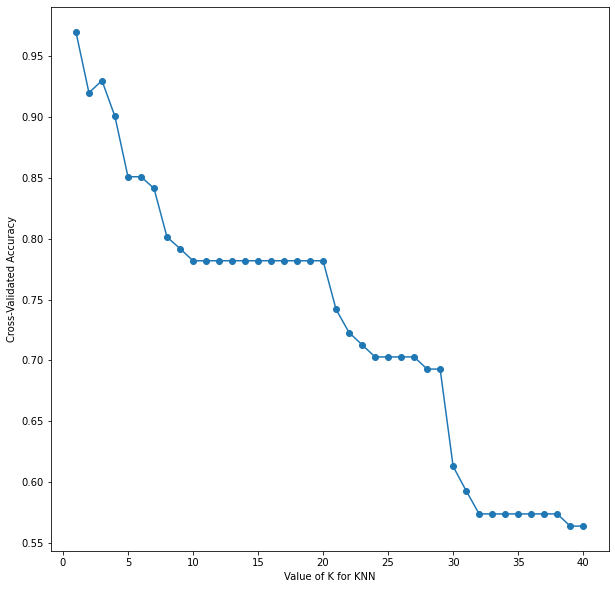

0.97


In [37]:
import matplotlib.pyplot as plt 
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,10))
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to calculate different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores, marker='o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()
print(max(k_scores))

In [38]:
import pandas as pd
pd.DataFrame(k_scores).sort_values(0)

,0
39,0.563810
38,0.563810
36,0.573810
35,0.573810
34,0.573810
33,0.573810
32,0.573810
31,0.573810
37,0.573810
30,0.592857


### Using Stratified KFold

In [39]:
from sklearn.model_selection import StratifiedKFold

In [40]:
kfold = StratifiedKFold(n_splits=10)
model = KNeighborsClassifier(n_neighbors=2)
results = cross_val_score(model, X, Y, cv=kfold)
print(results)
results.mean()

[1.  0.9 1.  1.  0.9 0.9 0.9 1.  0.9 0.9]


0.9400000000000001

### Visualizing the CV

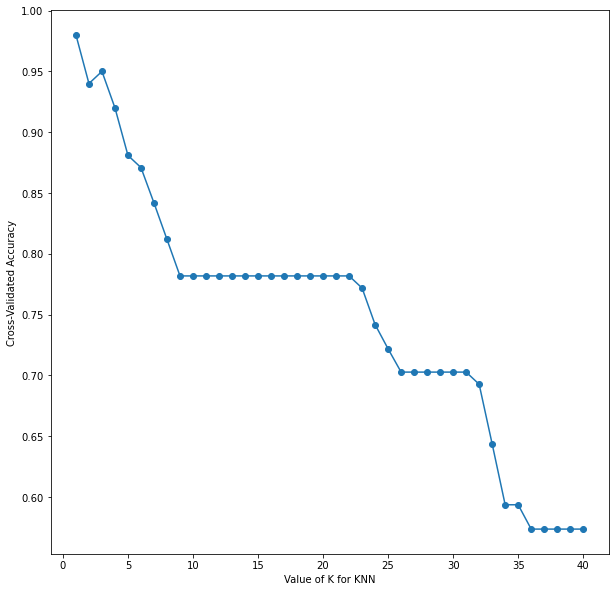

0.9800000000000001


In [41]:
import matplotlib.pyplot as plt 
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,10))

# choose k between 1 to 41
k_range = range(1, 41)
k_scores1 = []
kfold = StratifiedKFold(n_splits=10)
# use iteration to calculate different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=kfold)
    k_scores1.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores1, marker='o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()
print(max(k_scores1))

In [42]:
import pandas as pd
pd.DataFrame(k_scores1).sort_values(0)

,0
39,0.573636
35,0.573636
38,0.573636
37,0.573636
36,0.573636
34,0.593636
33,0.593636
32,0.643636
31,0.692727
25,0.702727
